In [2]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D,Dropout,UpSampling2D,Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization
import tempfile
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [270]:
def create_model(input_shape, pool_size):
    model = Sequential()
    model.add(BatchNormalization(input_shape=input_shape))

    # Conv Layer 1
    model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))

    # Conv Layer 2
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))

    # Pooling 1
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 3
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))
    model.add(Dropout(0.2))

    # Conv Layer 4
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
    model.add(Dropout(0.2))

    # Conv Layer 5
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))
    model.add(Dropout(0.2))

    # Pooling 2
    model.add(MaxPooling2D(pool_size=pool_size))

    # Conv Layer 6
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
    model.add(Dropout(0.2))

    # Conv Layer 7
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
    model.add(Dropout(0.2))

    # Pooling 3
    model.add(MaxPooling2D(pool_size=pool_size))

    # Upsample 1
    model.add(UpSampling2D(size=pool_size))

    # Deconv 1
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
    model.add(Dropout(0.2))

    # Deconv 2
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
    model.add(Dropout(0.2))

    # Upsample 2
    model.add(UpSampling2D(size=pool_size))

    # Deconv 3
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
    model.add(Dropout(0.2))

    # Deconv 4
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
    model.add(Dropout(0.2))

    # Deconv 5
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
    model.add(Dropout(0.2))

    # Upsample 3
    model.add(UpSampling2D(size=pool_size))

    # Deconv 6
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))

    # Final layer
    model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))

    return model


In [272]:
train_images = pickle.load(open("/drive/MyDrive/Lane Detection/full_CNN_train.p", "rb" ))

labels = pickle.load(open("/drive/MyDrive/Lane Detection/full_CNN_labels.p", "rb" ))

train_images = np.array(train_images)
labels = np.array(labels)

# Normalize labels
labels = labels / 255

train_images, labels = shuffle(train_images, labels)

X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.1)

In [273]:
batch_size = 128
epochs = 10
pool_size = (2, 2)
input_shape = X_train.shape[1:]

# Create the neural network
model = create_model(input_shape, pool_size)

#Data augmentation
datagen = ImageDataGenerator(channel_shift_range=0.2)
datagen.fit(X_train)

In [275]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=len(X_train)/batch_size,epochs=epochs, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10


<ipython-input-275-c48fd18de3ea>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=len(X_train)/batch_size,epochs=epochs, verbose=1, validation_data=(X_val, y_val))


89/89 [==============================] - 871s 10s/step - loss: 0.0512 - val_loss: 0.0383
Epoch 2/10
89/89 [==============================] - 855s 10s/step - loss: 0.0162 - val_loss: 0.0130
Epoch 3/10
89/89 [==============================] - 864s 10s/step - loss: 0.0124 - val_loss: 0.0111
Epoch 4/10
89/89 [==============================] - 858s 10s/step - loss: 0.0107 - val_loss: 0.0094
Epoch 5/10
89/89 [==============================] - 854s 10s/step - loss: 0.0097 - val_loss: 0.0094
Epoch 6/10
89/89 [==============================] - 853s 10s/step - loss: 0.0089 - val_loss: 0.0079
Epoch 7/10
89/89 [==============================] - 859s 10s/step - loss: 0.0081 - val_loss: 0.0068
Epoch 8/10
89/89 [==============================] - 844s 9s/step - loss: 0.0075 - val_loss: 0.0063
Epoch 9/10
89/89 [==============================] - 850s 9s/step - loss: 0.0069 - val_loss: 0.0062
Epoch 10/10
89/89 [==============================] - 852s 9s/step - loss: 0.0065 - val_loss: 0.0061


In [276]:
model.trainable = False
model.compile(optimizer='Adam', loss='mean_squared_error')

In [277]:
model.save('full_CNN_model.h5')

In [278]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_32 (Bat  (None, 80, 160, 3)       12        
 chNormalization)                                                
                                                                 
 Conv1 (Conv2D)              (None, 78, 158, 8)        224       
                                                                 
 Conv2 (Conv2D)              (None, 76, 156, 16)       1168      
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 38, 78, 16)       0         
 g2D)                                                            
                                                                 
 Conv3 (Conv2D)              (None, 36, 76, 16)        2320      
                                                                 
 dropout_331 (Dropout)       (None, 36, 76, 16)      

1/1 [==============================] - 0s 43ms/step


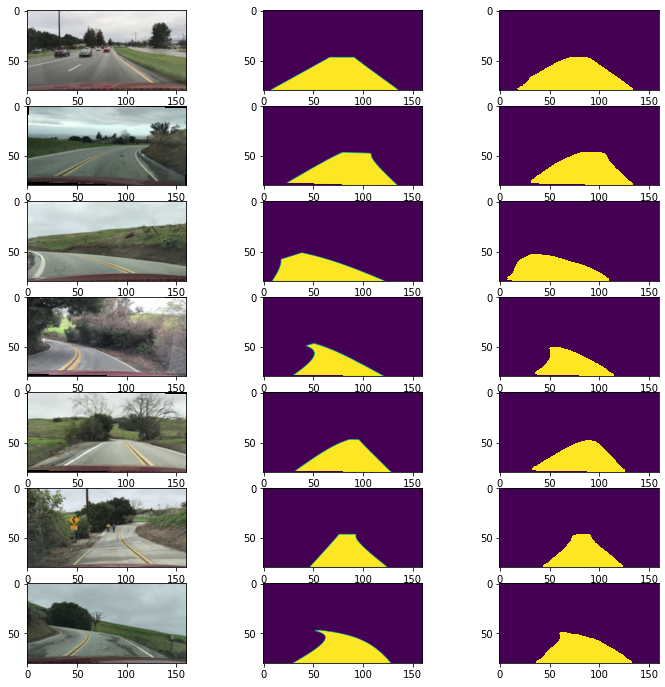

In [288]:
imgs=[]
for i in range(3,11):
    imgs.append(np.array(X_val[i]))
    
    imgs.append(np.array(y_val[i].reshape(80,160)))

    img= X_val[i]
    img=img[None,:,:,:]
    ypr=model.predict(img)[0] 
    ypr=np.where(ypr<0.5,0,1)*255
    imgs.append(np.array(ypr.reshape(80,160)))
    
_, axs = plt.subplots(7, 3, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()
     